# Classifying Heart Disease with Logistics Regression Modeling

The purpose of the project is to utilize logistics regression modeling to predict heart disease. This project will use a Heart Disease Data Set from the UCI Machine Learning Repository which captures various data inlcluding: age, chest pain and other patient characteristics to classify the precense of heart disease.

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# importing libraries and modules     

In [2]:
heart = pd.read_csv("heart_disease.csv")
heart.head()

# importing data viewing the top 5 rows

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


### Data Profiling

In [3]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    int64  
 3   cp          303 non-null    int64  
 4   trestbps    303 non-null    int64  
 5   chol        303 non-null    int64  
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     303 non-null    int64  
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    object 
 13  thal        303 non-null    object 
 14  present     303 non-null    int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 35.6+ KB


In [4]:
heart.describe()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,present
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,152.000000,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.458746
std,87.612784,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.499120
min,1.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,76.500000,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,152.000000,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,227.500000,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,303.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


No issues with null values or data types. Summary statistics do not present any obvious issues as well.

### Features Selection

<AxesSubplot:>

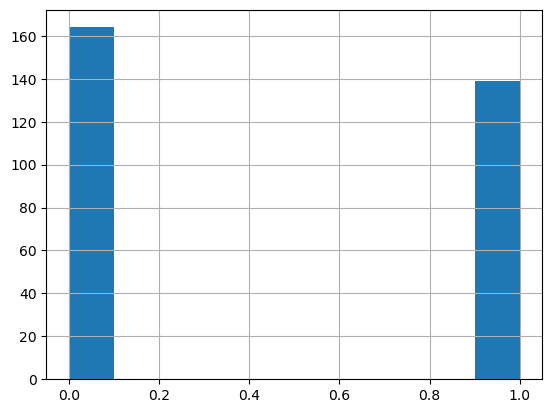

In [5]:
heart["present"].hist()

Based on the historgram plot above, our target variable has a good distribution of cases and non-cases of heart disease. These means there shouldn't be any issues when splitting the data into training vs test sets

In [6]:
heart = heart[~heart.isin(["?"]).any(axis = 1)]

heart["ca"] = heart["ca"].astype(float)
heart["thal"] = heart["thal"].astype(float)

# There are < 10 rows in columns ca and thal with ? values. After reviewing the definitions, will drop the columns and convert to numerics

In [7]:
heart.corr()["present"].sort_values()

# reviewing correlation coeffs

thalach      -0.423817
fbs           0.003167
Unnamed: 0    0.051891
chol          0.080285
trestbps      0.153490
restecg       0.166343
age           0.227075
sex           0.278467
slope         0.333049
cp            0.408945
exang         0.421355
oldpeak       0.424052
ca            0.463189
thal          0.526640
present       1.000000
Name: present, dtype: float64

In [8]:
diff_df = heart.groupby("present").agg(
    {
        "age": "mean",
        "sex": "mean",
        "cp": "mean",
        "trestbps": "mean",
        "chol": "mean",
        "fbs": "mean",
        "restecg": "mean",
        "thalach": "mean",
        "exang": "mean",
        "oldpeak": "mean",
        "slope": "mean",
        "ca": "mean",
        "thal": "mean"
    }
)

# reviewing highest variations in means between variables

In [9]:
differences = diff_df.iloc[1]- diff_df.iloc[0]
differences.sort_values()

# reviewing highest mean change within predictors

thalach    -19.471761
fbs          0.002235
sex          0.261268
restecg      0.331432
exang        0.396396
slope        0.412318
cp           0.790192
ca           0.870985
oldpeak      0.990301
thal         2.044617
age          4.115374
trestbps     5.460036
chol         8.360265
dtype: float64

Based on the mean average differences and linear correlations, we will use thalach, thal, oldpeak, and ca as our predictors as these have the highest R^2 linear correlations with also high differences in mean values.

### Creating the Model

In [10]:
X = heart[["age", "thalach", "restecg", "ca"]]
y = heart["present"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 44)

# splitting data into training and test sets

In [11]:
print("Y_train negative: ", sum(y_train == 0))
print("Y_train positive: ", sum(y_train == 1))
print("Y_test negative: ", sum(y_test == 0))
print("Y_test positive: ", sum(y_test == 1))

# confirming we have sufficient predictors and all sets of data

Y_train negative:  122
Y_train positive:  100
Y_test negative:  38
Y_test positive:  37


In [12]:
model = LogisticRegression()
model.fit(X_train, y_train)

# running logistics regression model

LogisticRegression()

### Model Accuracy on Training Data

In [18]:
acc = model.score(X_train, y_train)

predictions = model.predict(X_train)
tp = sum((predictions == 1) & (y_train == 1))
fp = sum((predictions == 1) & (y_train == 0))
tn = sum((predictions == 0) & (y_train == 0))
fn = sum((predictions == 0) & (y_train == 1))
sens = tp / (tp + fn)
spec = tn / (tn + fp)

print("Training Accuracy: ", acc)
print("Training Sensitivity: ", sens)
print("Training Specificity: ", spec)

Training Accuracy:  0.7702702702702703
Training Sensitivity:  0.68
Training Specificity:  0.8442622950819673


Per the metrics above, the training data was accurate 77% of the time which is pretty good. Training sensitivity is how accurate positive cases are and specificity is how accurate negative cases were. Based on this, the model performs better on negative cases.

### Interpreting Model Coefficients

In [14]:
coefs = model.coef_
names = X.columns

# pulling coefs and column names

In [15]:
for n, c in zip(names, coefs[0]):
    print({n, c})

{-0.01926584111954089, 'age'}
{-0.041866232130862865, 'thalach'}
{0.24651681925605548, 'restecg'}
{1.090657806536614, 'ca'}


Based on these coefficients, as age decreases the risk for heart disease does as well as well as thalach which decreases the rate at a x4 factor as compared to age. The remaining variables restecg and increase likelihood of heart disease with increases with ca having a x4 factor compared to restecg.

### Model Evaluation

In [17]:
acc = model.score(X_test, y_test)

predictions = model.predict(X_train)
tp = sum((predictions == 1) & (y_train == 1))
fp = sum((predictions == 1) & (y_train == 0))
tn = sum((predictions == 0) & (y_train == 0))
fn = sum((predictions == 0) & (y_train == 1))
sens = tp / (tp + fn)
spec = tn / (tn + fp)

print("Training Accuracy: ", acc)
print("Training Sensitivity: ", sens)
print("Training Specificity: ", spec)

Training Accuracy:  0.72
Training Sensitivity:  0.68
Training Specificity:  0.8442622950819673


The metrics above show the model perfoerms worse on test data vs the training data although the model is still decent. Training sensitivity is how accurate positive cases are and specificity is how accurate negative cases were. Based on the test data we can againthe model performs better on negative cases.